# Data Representation
So far, we have seen data as a collection of observations of multiple variables. We often represented a dataset as a table or a data matrix. In all previous analyses, we have focused on the interpretation of the values of each variable.

However, in many cases (and especially when we have many variables), it is useful to given a geometric interpretation of data and see observations more generically as **d-dimensional data points**, not paying too much attention to variable names.

Consider the following data:

|Subject|Height (cm)|Weight (Kg)|
|-|-|-|
|1|175|70|
|2|160|60|
|3|180|78|
|4|160|75|
|5|155|58|
|6|190|110|

We can see each of these observations (the rows of the matrix) as a data point. Further, we can geometrically represent such points as follows:

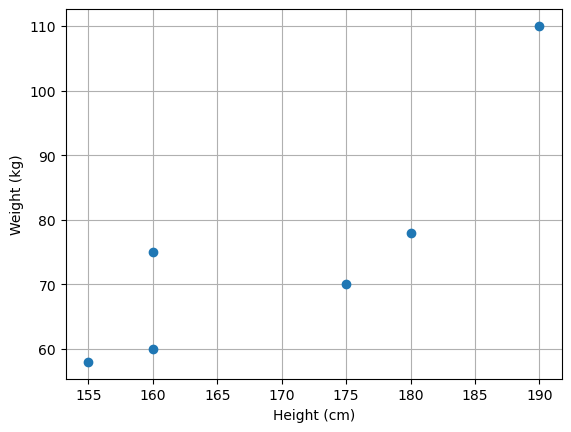

In [1]:
from matplotlib import pyplot as plt
plt.plot([175,160,180,160,155,190], [70,60,78,75,58,110],'o')
plt.grid()
plt.xlabel('Height (cm)')
plt.ylabel('Weight (kg)')
plt.show()

In this context in which we are not always **explicitly giving names or interpretation to the variables**, each of the variables will also be referred to as **a feature of the data**. For instance, **a dataset of images of $100 \times 100$ pixels can be seen as a collection of $10000$-dimensional vectors**, where each vector's dimension is a "feature", i.e., the value of a specific pixel of the image.

Given this interpretation of variables as features, it is often common to talk about **feature extraction**, in the case of any process transforming the data $\mathbf{x} \in \Re^d$ to another form $\mathbf{y} \in \Re^m$. In this context, a function:

$$f : \Re^d \to \Re^m$$

will be often referred to as a "**feature extraction function**" (of feature extractor) or a "**representation function**". We will recall these terms going further in the course. We will also refer to the process of mapping data using a representation function as **data representation**.

We will also refer to $\Re^d$ and $\Re^m$ as "**feature spaces**" or "**representation spaces**" as they will be **vector spaces** to which data points (also called **feature vectors**) belong.

## Important Properties of Feature Spaces
Since observations $\mathbf{x}$ are vectors living in some vector spaces, all **basic properties of vectors and vector spaces seen in linear algebra will apply here as well**. We'll recall the most important concepts as we need them in the course, but, for the moment, it is useful to summarize the main important properties.

### Norms
Given a vector space $S$, a norm $p$ is a function from $S$ to a non negative real number:

$$p : S \to \Re^+_0$$

A commonly used family of norms is the one of the L-p norms:

$$||\mathbf{x}||_p = \left( \sum_{i=1}^{d} |x_i|^p \right)^{1/p}$$

Where $\mathbf{x}$ is d-dimensional, $x_i$ is the i-th component of $\mathbf{x}$, and $p$ is a parameter defining the behavior of the norm.

Note that a norm computes some kind of measure of distance of the vector from the origin of the space. In practice, the following norms are commonly used:

**L-2 Norm**

$$||\mathbf{x}||_2 = \sqrt{\sum_{i=1}^{d} x_i^2}$$

This is what we know as "computing the magnitude (or modulus) of the vector". It is the Euclidean distance between the origin and the vector.

When we use the L2 norm, we can omit the $p=2$ subscript:

$$||\mathbf{x}||_2 = ||\mathbf{x}||$$

Another commonly used notation is the one for the squared L2 norm:

$$||\mathbf{x}||_2^2 = ||\mathbf{x}||^2 = \sum_{i=1}^{d} x_i^2$$

**L-1 Norm**

$$||\mathbf{x}||_1 = \sum_{i=1}^{d} |x_i|$$

This is the sum of the absolute values of the components of the vector.

**L-$\infty$ Norm**

$$||\mathbf{x}||_\infty = \max\{|x_i|\}_{i=1}^{d}$$

This is the maximum absolute value of the components of the vector.

To visualize the difference between the different norms, it often common to display the **unit circles according to the different norms**. Each of the shapes is made of **vectors with unit norm** according to specific norm:

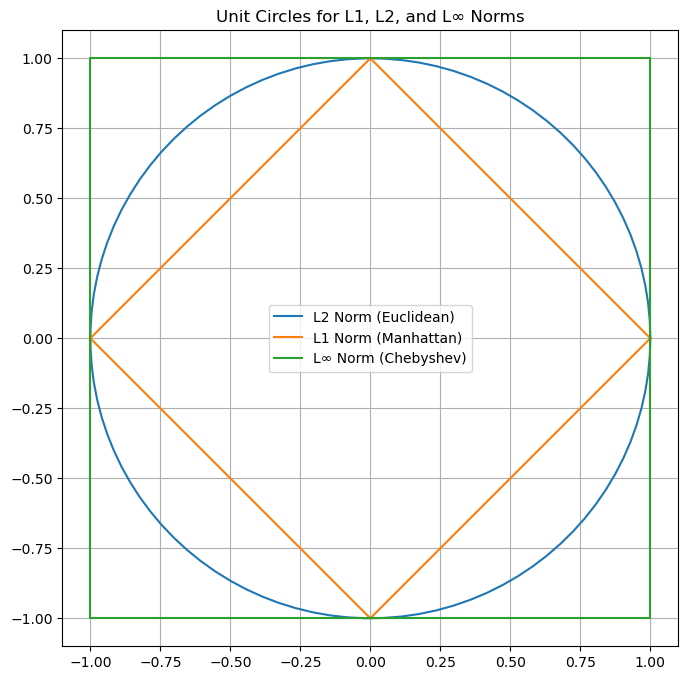

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Create a figure and axis
fig, ax = plt.subplots(figsize=(8, 8))

# 1. L2 Norm (The Circle)
theta = np.linspace(0, 2*np.pi, 100)
x_l2 = np.cos(theta)
y_l2 = np.sin(theta)
ax.plot(x_l2, y_l2, label='L2 Norm (Euclidean)')

# 2. L1 Norm (The Diamond)
# x + y = 1, x - y = 1, -x - y = 1, -x + y = 1
x_l1 = np.array([1, 0, -1, 0, 1])
y_l1 = np.array([0, 1, 0, -1, 0])
ax.plot(x_l1, y_l1, label='L1 Norm (Manhattan)')

# 3. L-infinity Norm (The Square)
x_linf = np.array([1, -1, -1, 1, 1])
y_linf = np.array([1, 1, -1, -1, 1])
ax.plot(x_linf, y_linf, label='L∞ Norm (Chebyshev)')

# Set equal aspect ratio
ax.set_aspect('equal', adjustable='box')

# Set labels and legend
ax.set_title('Unit Circles for L1, L2, and L∞ Norms')
ax.legend()
ax.grid(True)
plt.show()

### Metrics
Given a space $S$, a function

$$m : S \times S \to \Re$$

is **a metric** if the following properties are satisfied:

1. The distance of a point from itself is zero: $m(\mathbf{x}, \mathbf{x}) = 0$;
2. The distance between two distinct points is always positive (positivity) if $\mathbf{x} \neq \mathbf{y}$: $m(\mathbf{x},\mathbf{y}) > 0, \forall \mathbf{x}, \mathbf{y} \in S, \mathbf{x} \neq \mathbf{y}$;
3. The distance between $x$ and $y$ is the same as the distance between $y$ and $x$ (symmetry): $m(\mathbf{x}, \mathbf{y}) = m(\mathbf{y}, \mathbf{x})$.
4. Triangle inequality: $m(\mathbf{x},\mathbf{y}) \leq m(\mathbf{x},\mathbf{z}) + m(\mathbf{z},\mathbf{y}), \forall \mathbf{x}, \mathbf{y}, \mathbf{z} \in S$

#### L-p Metrics
From the L-p norms, we can derive **a family of metrics** as follows:

$$
L_p(\mathbf{x},\mathbf{y}) = ||\mathbf{x} - \mathbf{y}||_p = \left( \sum_{i=1}^{d} |x_i - y_i|^p \right)^{1/p}
$$

**L2 Distance**

Note that with $p=2$ we have the Euclidean (or L-2) distance:

$$L_2(\mathbf{x},\mathbf{y}) = ||\mathbf{x} - \mathbf{y}||_2 = \sqrt{\sum_{i=1}^{d} (x_i - y_i)^2}$$

**L1 Distance**

With $p=1$, we obtain the L1 distance, which is also known as the **Manhattan distance**:

$$L_1(\mathbf{x},\mathbf{y}) = ||\mathbf{x} - \mathbf{y}||_1 = \sum_{i=1}^{d} |x_i - y_i|$$

**L-$\infty$ Distance**

With $p=\inf$, we obtain the L-$\infty$ distance:

$$L_\infty(\mathbf{x},\mathbf{y}) = ||\mathbf{x} - \mathbf{y}||_\infty = \max_{i=1}^d\{|x_i - y_i|\}$$

The difference between the L1 and L2 distances is notable, as shown in the figure blow:

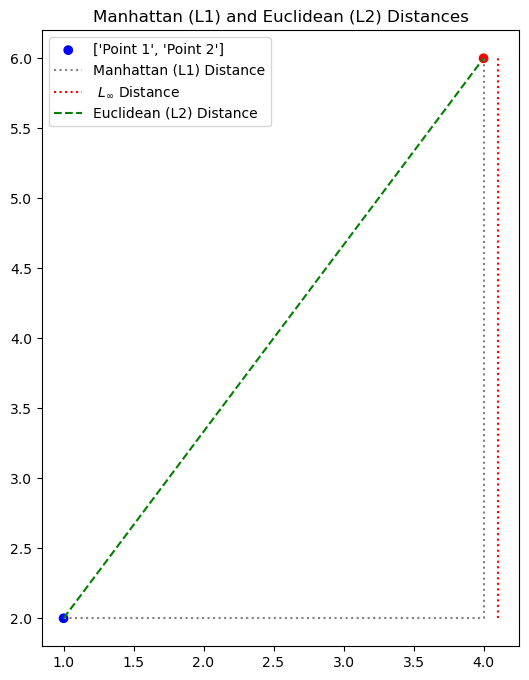

Manhattan (L1) Distance: 7.00
Euclidean (L2) Distance: 5.00
L-Inf Distance: 4.00


In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Define two points in 2D space
point1 = np.array([1, 2])
point2 = np.array([4, 6])

# Create a figure and axis
fig, ax = plt.subplots(figsize=(8, 8))

# Plot the points
ax.scatter([point1[0], point2[0]], [point1[1], point2[1]], c=['blue', 'red'], label=['Point 1', 'Point 2'])

# Connect the points with zig-zag lines for Manhattan (L1) distance
ax.plot([point1[0], point2[0], point2[0]], [point1[1], point1[1], point2[1]], linestyle='dotted', color='gray', label='Manhattan (L1) Distance')

# Connect the points with L-inf distance
ax.plot([point2[0]+0.1, point2[0]+0.1], [point1[1], point2[1]], linestyle='dotted', color='red', label=' $L_{\\infty}$ Distance')

# Calculate Manhattan (L1) distance
manhattan_distance = np.sum(np.abs(point2 - point1))

inf_distance = np.max(np.abs(point2-point1))

# Plot the diagonal (Euclidean distance)
ax.plot([point1[0], point2[0]], [point1[1], point2[1]], linestyle='dashed', color='green', label='Euclidean (L2) Distance')

# Calculate Euclidean (L2) distance
euclidean_distance = np.linalg.norm(point2 - point1)

# Set equal aspect ratio
ax.set_aspect('equal', adjustable='box')

# Set labels and legend
ax.set_title('Manhattan (L1) and Euclidean (L2) Distances')
ax.legend()

# Display the plot
plt.show()

print(f"Manhattan (L1) Distance: {manhattan_distance:.2f}")
print(f"Euclidean (L2) Distance: {euclidean_distance:.2f}")
print(f"L-Inf Distance: {inf_distance:.2f}")


While the Euclidean distance measures the length of the straight segment connecting the two points, the Manhattan distance is the one in grey (dashed), which measures the distance that a taxi driver should drive in Manhattan (or any other square-block based city) to reach the destination.

#### Cosine Distance
The cosine distance is useful when we need to compare two vectors but we do not care about differences arising from scaling factors. Note that the Euclidean distance of two proportional vectors is in general non-zero:

$$||\mathbf{x} - \alpha \mathbf{x}||^2 > 0, \alpha \neq 1$$

Nevertheless, $\mathbf{x}$ and $\alpha \mathbf{x}$ are very similar. If we want to compare two vectors considering only **the relationships between their coordinates, rather than their values**, we can use the cosine similarity, which is defined as follows:

$$S_C (\mathbf{x}, \mathbf{y}) = \frac{\mathbf{x} \cdot \mathbf{y}}{||\mathbf{x}|| ||\mathbf{y}||}$$

The cosine similarity computes the cosine of the angle $\theta$ comprised between two vectors, as shown in the plot below:

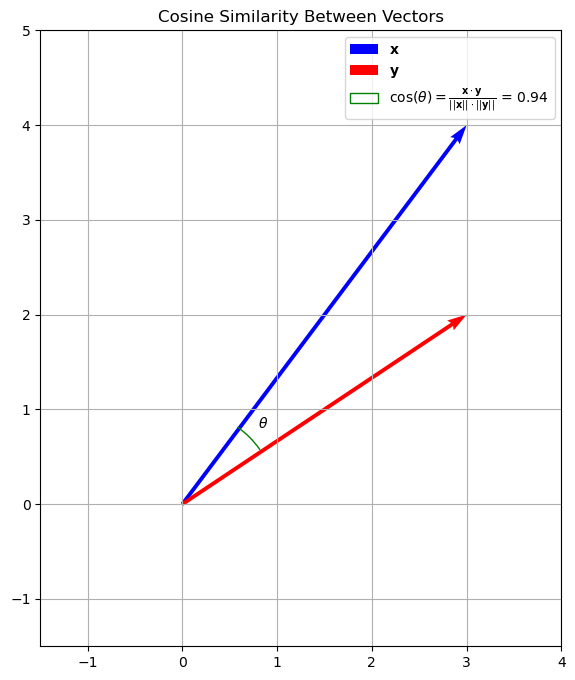

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Arc

# Define two vectors
vector1 = np.array([3, 4])
vector2 = np.array([3, 2])

# Calculate cosine similarity
cosine_similarity = np.dot(vector1, vector2) / (np.linalg.norm(vector1) * np.linalg.norm(vector2))

# Create a figure and axis
fig, ax = plt.subplots(figsize=(8, 8))

# Plot the vectors
ax.quiver(0, 0, vector1[0], vector1[1], angles='xy', scale_units='xy', scale=1, color='blue', label='$\\mathbf{x}$')
ax.quiver(0, 0, vector2[0], vector2[1], angles='xy', scale_units='xy', scale=1, color='red', label='$\\mathbf{y}$')

# Set the aspect ratio of the plot to be equal
ax.set_aspect('equal', adjustable='box')

# Plot the angle between vectors
angle = np.degrees(np.arccos(cosine_similarity))
arc = Arc((0, 0), 2, 2, angle=angle*1.8, theta1=0, theta2=angle, color='green', label='$\\cos(\\theta) = \\frac{\\mathbf{x} \cdot \\mathbf{y}}{||\\mathbf{x}||\cdot ||\\mathbf{y}||}$ = '+f"{cosine_similarity:0.2f}")
ax.add_patch(arc)
ax.text(0.8,0.8,"$\\theta$")

# Set limits
ax.set_xlim([-1.5, 4])
ax.set_ylim([-1.5, 5])

# Set labels and legend
ax.set_title('Cosine Similarity Between Vectors')
plt.grid()
ax.legend()

# Display the plot
plt.show()


Note that the cosine similarity would be the same if the two vectors had different scales (i.e., if they were longer but they would have the same orientation).

This kind of similarity measure is useful when the scale of the vector is not important. For instance, if the vectors $\mathbf{x}$ and $\mathbf{y}$ are vectors of word counts of two documents of different lengths, we care about the **proportions of words in each document, while longer document will have vectors with larger L2 norms**.

The cosine similarity is a normalized number between $-1$ and $1$, where:

* $+1$ means maximum alignment (similarity) between the two vectors;
* $-1$ means that the two vectors are dissimilar - they are indeed opposite.
* $0$ means that the two vectors are orthogonal.

The plot below shows different examples of cosine similarity of vector pairs:

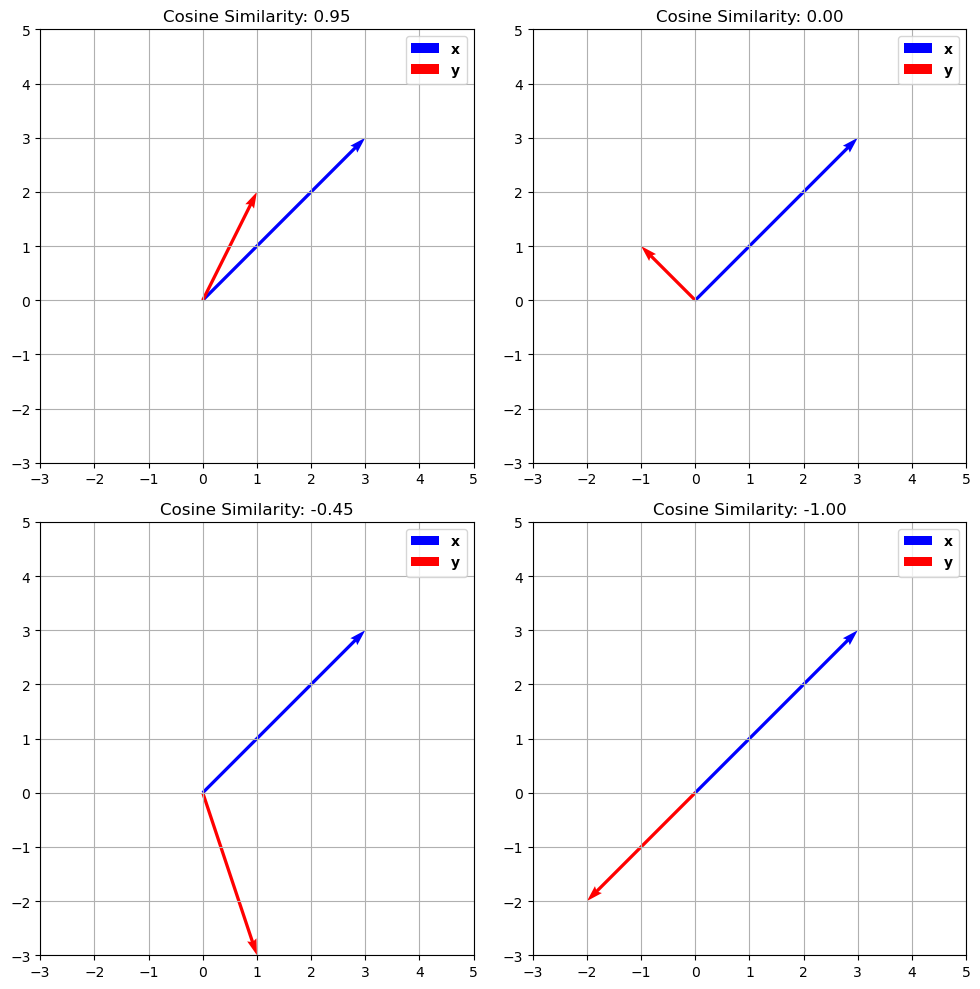

In [5]:
import numpy as np
import matplotlib.pyplot as plt

# Define two vectors
vector1 = np.array([3, 3])
vectors2 = [np.array([1, 2]), np.array([-1, 1]), np.array([1, -3]), np.array([-2, -2])]

# Create a figure with subplots
fig, axes = plt.subplots(2, 2, figsize=(10, 10))

# Flatten the axes for easy iteration
axes = axes.flatten()

# Iterate through vectors2 and plot each subplot
for i, vector2 in enumerate(vectors2):
    # Calculate cosine similarity
    cosine_similarity = np.dot(vector1, vector2) / (np.linalg.norm(vector1) * np.linalg.norm(vector2))

    # Plot the vectors
    axes[i].quiver(0, 0, vector1[0], vector1[1], angles='xy', scale_units='xy', scale=1, color='blue', label='$\\mathbf{x}$')
    axes[i].quiver(0, 0, vector2[0], vector2[1], angles='xy', scale_units='xy', scale=1, color='red', label='$\\mathbf{y}$')

    # Set the aspect ratio of the plot to be equal
    axes[i].set_aspect('equal', adjustable='box')

    # Set labels and legend
    axes[i].set_title(f'Cosine Similarity: {cosine_similarity:.2f}')
    axes[i].legend()
    axes[i].grid()

# Set limits for all subplots
for ax in axes:
    ax.set_xlim([-3, 5])
    ax.set_ylim([-3, 5])

# Adjust layout
plt.tight_layout()

# Display the plot
plt.show()


The cosine distance is defined from the cosine similarity as:

$$D_C = 1- S_C = 1- \frac{\mathbf{x} \cdot \mathbf{y}}{||\mathbf{x}|| \cdot ||\mathbf{x}||}$$

It should be noted that the cosine similarity is not a metric as it does not satisfy the triangular inequality. 

## Features and Representation Functions
Data representation can help making data analysis processes simpler. Consider for example the example below:

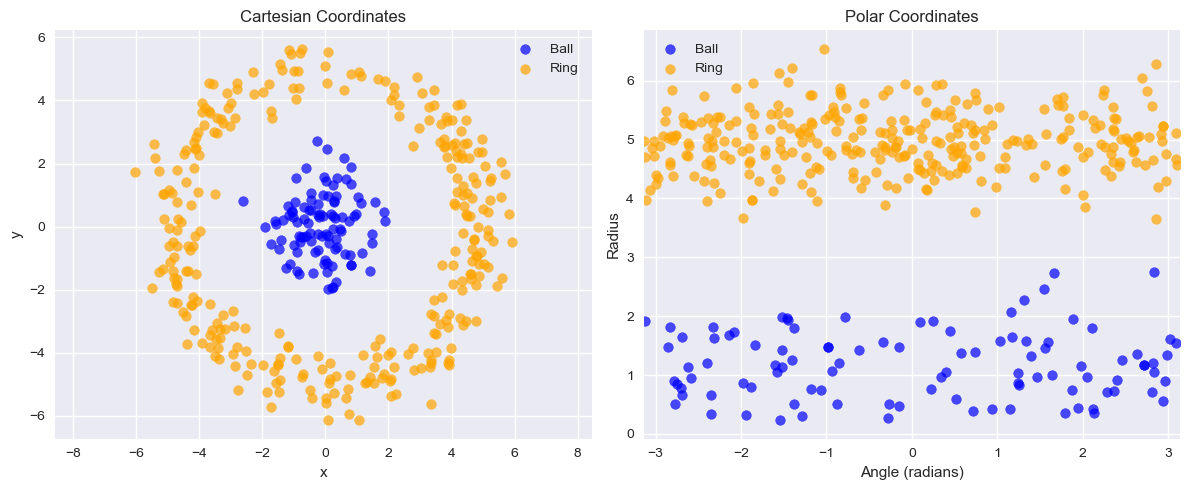

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Step 1: Generate synthetic ball-and-ring data
np.random.seed(42)
n_ball = 100
n_ring = 300

# Central ball (Class 0)
ball = np.random.normal(loc=0.0, scale=1.0, size=(n_ball, 2))
ball_labels = np.zeros(n_ball)

# Surrounding ring (Class 1)
angles = np.random.uniform(0, 2 * np.pi, n_ring)
radii = np.random.normal(loc=5.0, scale=0.5, size=n_ring)
x_ring = radii * np.cos(angles)
y_ring = radii * np.sin(angles)
ring = np.column_stack((x_ring, y_ring))
ring_labels = np.ones(n_ring)

# Combine
X = np.vstack((ball, ring))
y = np.concatenate((ball_labels, ring_labels))

# Step 2: Convert to polar coordinates
r = np.sqrt(X[:, 0]**2 + X[:, 1]**2)
theta = np.arctan2(X[:, 1], X[:, 0])

# Step 3: Plot both views
plt.style.use('seaborn-v0_8')
fig, ax = plt.subplots(1, 2, figsize=(12, 5))

# Cartesian view
ax[0].scatter(X[y == 0][:, 0], X[y == 0][:, 1], color='blue', label='Ball', alpha=0.7)
ax[0].scatter(X[y == 1][:, 0], X[y == 1][:, 1], color='orange', label='Ring', alpha=0.7)
ax[0].set_title("Cartesian Coordinates")
ax[0].set_xlabel("x")
ax[0].set_ylabel("y")
ax[0].axis('equal')
ax[0].legend()

# Polar view
ax[1].scatter(theta[y == 0], r[y == 0], color='blue', label='Ball', alpha=0.7)
ax[1].scatter(theta[y == 1], r[y == 1], color='orange', label='Ring', alpha=0.7)
ax[1].set_title("Polar Coordinates")
ax[1].set_xlabel("Angle (radians)")
ax[1].set_ylabel("Radius")
ax[1].set_xlim(-np.pi, np.pi)
ax[1].legend()

plt.tight_layout()
plt.show()

The data on the left in not linearly separable. However, taking polar coordinates in this form (in practice the case-defined `atan2` function is used instead of `arctan` to handle quadrants correctly):

$$r = \sqrt{x^2 + y^2} $$
$$\theta = \arctan\left(\frac{y}{x}\right)$$

We obtain a linearly separable set of data which could be classified with a linear classifier.

### From Hand-Crafted Features to Learned Representations

The polar coordinate example is powerful. It shows that a problem that is impossible for a linear model in one space (Cartesian) can become trivial in another space (Polar).

In this case, we used our human intuition to "hand-craft" a new feature representation ($r$, $\theta$) that solved the problem. This is the traditional approach to machine learning.

#### The "Black Box" Feature Extractor

In practice, for complex data like images, audio, or text, we can't manually discover the perfect feature function.
* What is the "radius" of a picture of a cat?
* What is the "angle" of a legal document?

This is where modern machine learning, particularly **Deep Learning**, comes in. The dominant approach today is to *learn* the representation function $f$ from the data itself.

We can treat these massive, pre-trained models as powerful "black-box" feature extractors.

* **For Text:** We can use models like **BERT**, **GPT**, or **Sentence Transformers**. You can feed a raw sentence into one of these models and get a 768-dimensional vector as output. This vector is a rich, numerical "feature vector" that understands the *semantic meaning* of the sentence. Libraries like **Hugging Face `transformers`** are the standard toolkit for this.

* **For Images:** We can use pre-trained **Convolutional Neural Networks (CNNs)** like **ResNet** or **Vision Transformers (ViT)**. You feed in a raw image and get a 2048-dimensional vector that represents its visual content.

* **For Audio:** We can use traditional features like **MFCCs** (Mel-Frequency Cepstral Coefficients) or use deep models like **1D CNNs** or **Audio Transformers** like **Wav2Vec2**. You feed in a raw waveform and get a feature vector that represents the acoustic content, speaker identity, or spoken words.

In all cases, the principle is the same. Whether hand-crafted (like $r$ and $\theta$) or learned (like a Transformer), the goal of the representation function $f: \Re^d \to \Re^m$ is to map the "messy" raw data into a new **feature space** where the relationships are simpler and a classifier can easily find the decision boundary.

#### Data Processing Inequality

The Data Processing Inequality (DPI) states that applying any data transformation, whether deterministic or stochastic, can never increase the information content about an original random variable. In simple terms: processing data can only lose or preserve information, never create it.

Mathematically, if we have a Markov chain $X \rightarrow Y \rightarrow Z$, meaning $Z$ is conditionally independent of $X$ given $Y$, then the mutual information satisfies:

$$
I(X; Y) \geq I(X; Z)
$$

Here, $I(X; Y)$ represents the shared information between random variables $X$ and $Y$. This inequality implies that as data $X$ is successively transformed into $Y$ and then $Z$, the amount of information about the original variable $X$ can only decrease or stay the same; it can never increase.

This principle has profound implications for feature engineering:

* **Irreversible Loss** If hand-crafted features inadvertently discard crucial information about the underlying signal, that information is permanently lost and cannot be recovered by subsequent modeling steps.
* **Information Bottleneck** Poor feature design creates an information bottleneck, limiting the maximum performance achievable by any machine learning model built upon those features.

* **The Advantage of Learned Features** Deep learning models aim to learn representations that preserve maximal task-relevant information directly from raw data, minimizing the risk of premature information loss.

## Lab: The Critical Importance of Feature Representation

So far, we have learned about algorithms (like KNN) and the "Curse of Dimensionality." We've also discussed how we can *represent* data, from raw vectors (pixels) to hand-crafted features (polar coordinates) to "learned" features (like from your `DLFeat` library).

In this lab, we will prove that **feature representation is often more important than the choice of algorithm.**

We will conduct two "bake-offs" to show how a simple `KNeighborsClassifier` (which we know is sensitive to dimensionality and distance) performs in different feature spaces.

1.  **Image Task (CIFAR):** We'll compare KNN on **raw pixels** vs. KNN on **"smart" CNN features**.
2.  **Text Task (Spam):** We'll compare the "classic" `MultinomialNB` vs. KNN on word counts vs. KNN on "smart" deep features.

We will use the `sklearn` library for KNN and other utilities, and `DLFeat` for deep learning-based text features.

Let's start by installing libraries:

In [35]:
!pip install torch torchvision torchaudio scikit-learn Pillow numpy scipy av
!pip install transformers sentence-transformers timm requests
!pip install --upgrade torch torchvision torchaudio transformers sentence-transformers timm requests
!pip install git+https://github.com/antoninofurnari/dlfeat.git

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 74.5/74.5 MB 10.0 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 10.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 808.1/808.1 kB 7.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.7/21.7 MB 4.8 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4/4 [torchaudio]4 [torchaudio]]
  Using cached transformers-4.57.1-py3-none-any.whl.metadata (43 kB)
  Using cached huggingface_hub-0.36.0-py3-none-any.whl.metadata (14 kB)
  Using cached tokenizers-0.22.1-cp39-abi3-macosx_11_0_arm64.whl.metadata (6.8 kB)
  Using cached safetensors-0.6.2-cp38-abi3-macosx_11_0_arm64.whl.metadata (4.1 kB)
Using cached transformers-4.57.1-py3-none-any.whl (12.0 MB)
Using cached huggingface_hub-0.36.0-py3-none-any.whl (566 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.7/2.7 MB 10.9 MB/s eta 0:00:00 0:00:01
Using cached tokenizers-0.22.1-cp39-abi3-macosx_11_0_arm64.whl (2.9 MB)
   ━━

Let's import dependencies:

In [13]:
# --- 1. All Imports ---
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time
import os
import joblib # Using joblib for efficient saving of numpy arrays

# --- Sklearn Tools ---
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, accuracy_score

# --- Models ---
from sklearn.neighbors import KNeighborsClassifier

# --- Data and Feature Extractors ---
from torchvision.datasets import CIFAR10
from PIL import Image
from dlfeat import DLFeatExtractor

### Part 1: The Image Challenge (Handwritten Digits)
We will build two KNN models to classify images from the **CIFAR-10** dataset.

* **Model 1 (The "Dumb" Baseline):** We will train KNN on **raw pixel data**. This is a "dumb," high-dimensional space (32x32x3 = 3,072 features). We expect this to perform poorly.
* **Model 2 (The "Smart" Model):** We will first use a powerful, pre-trained Convolutional Neural Network (CNN) from your `DLFeat` library to extract "smart" **semantic features**. We will then train KNN on this new, "clean" feature space.

We hypothesize that the simple KNN model will perform *dramatically* better when using the "smart" features.

#### Step 1: Load and Visualize the CIFAR-10 Data

First, let's load the data. CIFAR-10 consists of 60,000 32x32 color images in 10 classes. For speed, we'll use a subset of 5,000 for training and 1,000 for testing.

We will prepare our data in two formats:
1.  **`X_train_pil`**: A list of PIL Image objects, required by `DLFeatExtractor`.
2.  **`X_train_raw`**: A NumPy array of flattened pixel vectors (shape `(N, 3072)`), for our baseline KNN.

In [14]:
# --- 1. Load CIFAR-10 Dataset ---
print("1. Loading CIFAR-10 dataset...")
try:
    cifar10_train_raw = CIFAR10(root='./cifar_data', train=True, download=True)
    cifar10_test_raw = CIFAR10(root='./cifar_data', train=False, download=True)
    
    class_names = cifar10_train_raw.classes
    print(f"   Classes: {class_names}")

    # Extract a subset for faster demonstration
    num_train_samples = 5000
    num_test_samples = 1000

    # Get PIL Images (for DLFeat)
    X_train_pil = [cifar10_train_raw[i][0] for i in range(num_train_samples)]
    y_train = [cifar10_train_raw[i][1] for i in range(num_train_samples)]
    
    X_test_pil = [cifar10_test_raw[i][0] for i in range(num_test_samples)]
    y_test = [cifar10_test_raw[i][1] for i in range(num_test_samples)]

    # Get Raw Pixel vectors (for Baseline KNN)
    # Shape = (N, 32*32*3) = (N, 3072)
    X_train_raw = np.array([np.array(img).flatten() for img in X_train_pil])
    X_test_raw = np.array([np.array(img).flatten() for img in X_test_pil])

    print(f"   Subset loaded: {len(X_train_pil)} training samples, {len(X_test_pil)} testing samples.")
    print(f"   Raw pixel data shape: {X_train_raw.shape}")

except Exception as e:
    print(f"Error loading or processing CIFAR-10: {e}")

1. Loading CIFAR-10 dataset...


100%|██████████| 170M/170M [00:43<00:00, 3.93MB/s] 


   Classes: ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
   Subset loaded: 5000 training samples, 1000 testing samples.
   Raw pixel data shape: (5000, 3072)


#### Step 2: Look at the Task
Let's see what these images actually look like. They are small (32x32) and can be hard to recognize.

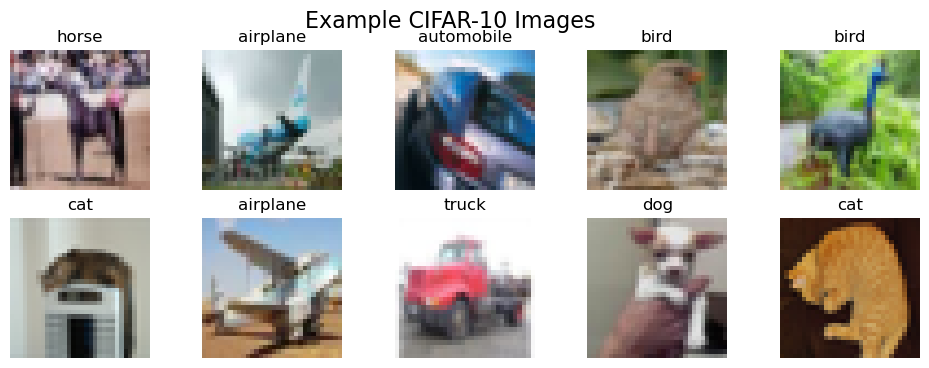

In [15]:
# Show 10 random sample images
plt.figure(figsize=(12, 4))
for i in range(10):
    ax = plt.subplot(2, 5, i + 1)
    idx = np.random.randint(0, len(X_train_pil))
    plt.imshow(X_train_pil[idx])
    plt.title(class_names[y_train[idx]])
    plt.axis('off')
plt.suptitle('Example CIFAR-10 Images', fontsize=16)
plt.show()

#### Step 3: Baseline (KNN on Raw Pixels)

First, we'll train our baseline model. We create a `Pipeline` that scales the 3,072 pixel values (a critical step) and then runs our KNN classifier. We expect this to perform poorly due to the **Curse of Dimensionality**—the 3,072-dimensional space is too large and "empty" for "nearest neighbor" to be a meaningful concept.

In [16]:
# 1. Create a simple KNN pipeline for raw pixels
# We must scale the pixel data!
pipe_knn_raw = Pipeline([
    ('scaler', StandardScaler()),
    ('model', KNeighborsClassifier(n_neighbors=5))
])

# 2. Fit and score
print("Fitting KNN on RAW 3072-pixel features...")
start_time = time.time()
pipe_knn_raw.fit(X_train_raw, y_train)
y_pred_raw = pipe_knn_raw.predict(X_test_raw)
acc_raw = accuracy_score(y_test, y_pred_raw)
time_raw = time.time() - start_time

print(f"   Accuracy (KNN on Raw Pixels): {acc_raw*100:.2f}%")
print(f"   Time taken: {time_raw:.2f} seconds")

# Store results for our final chart
results = {
    'KNN on Raw Pixels': acc_raw
}

Fitting KNN on RAW 3072-pixel features...
   Accuracy (KNN on Raw Pixels): 26.20%
   Time taken: 0.63 seconds


#### Step 4: Extract "Smart" Features with `DLFeat` (The Expensive Step)

Now, we'll use a pre-trained **ResNet18** model via your `DLFeatExtractor` to convert our images into "smart" feature vectors. This model has already learned about edges, shapes, and objects from the ImageNet dataset.

This step is **computationally expensive** and only needs to be done *once*. We will run it and then **save the resulting feature vectors to disk** (`.pkl` files) to save time in the future.

In [22]:
# Define file paths for our cached features
FEATURE_FILE_TRAIN = 'cifar_train_resnet18.pkl'
FEATURE_FILE_TEST = 'cifar_test_resnet18.pkl'
MODEL_NAME = "resnet18"

# Check if features are already saved
if os.path.exists(FEATURE_FILE_TRAIN) and os.path.exists(FEATURE_FILE_TEST):
    print("Loading 'smart' features from disk... (This is fast!)")
    X_train_deep = joblib.load(FEATURE_FILE_TRAIN)
    X_test_deep = joblib.load(FEATURE_FILE_TEST)
    print("   Features loaded.")

else:
    # If not on disk, we must extract them
    print(f"No cached features found. Initializing DLFeatExtractor with model: {MODEL_NAME}...")
    try:
        feature_extractor = DLFeatExtractor(model_name=MODEL_NAME, task_type="image")
        print(f"   Feature dimension will be: {feature_extractor.get_feature_dimension()}")

        # 1. Extract Training Features
        print("   Extracting training features (this is the slow part)...")
        start_time_extract = time.time()
        # We pass the list of PIL Images: X_train_pil
        X_train_deep = feature_extractor.fit(X_train_pil)
        X_train_deep = feature_extractor.transform(X_train_pil)
        
        # 2. Extract Test Features
        print("   Extracting test features...")
        X_test_deep = feature_extractor.transform(X_test_pil)
        time_extract = time.time() - start_time_extract
        print(f"   Feature extraction complete. Time: {time_extract:.2f}s")
        
        # 3. Save features to disk for next time
        print("   Saving features to disk...")
        joblib.dump(X_train_deep, FEATURE_FILE_TRAIN)
        joblib.dump(X_test_deep, FEATURE_FILE_TEST)

    except Exception as e:
        print(f"   Error initializing or using DLFeatExtractor: {e}")
        # In case of error, create dummy variables so the lab can continue
        X_train_deep, X_test_deep = None, None

print(f"\n'Smart' feature shape: {X_train_deep.shape}")

Loading 'smart' features from disk... (This is fast!)
   Features loaded.

'Smart' feature shape: (5000, 512)


#### Step 5: KNN on "Smart" Features

Now we have our new "smart" feature set, `X_train_deep`. Instead of 3072 "noisy" pixel features, we have 512 "smart" semantic features.

Let's train our *same* KNN pipeline on this new, better data.

In [23]:
# 1. Create a *new* pipeline for these *new* features
pipe_knn_deep = Pipeline([
    ('scaler', StandardScaler()), # Still good practice to scale the CNN features
    ('model', KNeighborsClassifier(n_neighbors=5))
])

# 2. Fit and score
print("Fitting KNN on 'smart' CNN features...")
start_time = time.time()
pipe_knn_deep.fit(X_train_deep, y_train)
y_pred_deep = pipe_knn_deep.predict(X_test_deep)
acc_deep = accuracy_score(y_test, y_pred_deep)
time_deep = time.time() - start_time

print(f"   Accuracy (KNN on CNN Features): {acc_deep*100:.2f}%")
print(f"   Time taken (training only): {time_deep:.2f} seconds")

# Store the result
results['KNN on Smart Features'] = acc_deep

Fitting KNN on 'smart' CNN features...
   Accuracy (KNN on CNN Features): 73.90%
   Time taken (training only): 0.11 seconds


#### Step 6: The Final Showdown (Bar Chart)

Let's compare the final accuracy of our two models.


--- FINAL BAKE-OFF RANKING ---
                       Test Accuracy
KNN on Smart Features          0.739
KNN on Raw Pixels              0.262


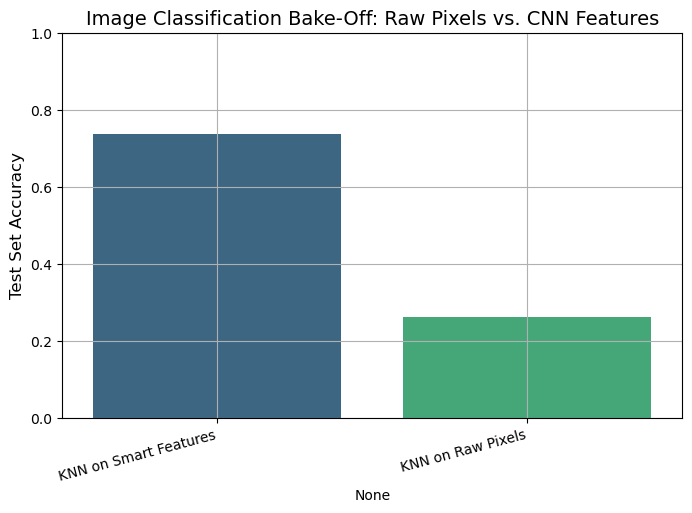

In [25]:
# Convert results to a pandas DataFrame
results_df = pd.DataFrame.from_dict(results, orient='index', columns=['Test Accuracy'])
results_df = results_df.sort_values(by='Test Accuracy', ascending=False)

print("\n--- FINAL BAKE-OFF RANKING ---")
print(results_df)

# Plot the comparison
plt.figure(figsize=(8, 5))
sns.barplot(
    x=results_df.index, 
    y=results_df['Test Accuracy'], 
    hue=results_df.index, 
    palette='viridis', 
    legend=False
)
plt.title('Image Classification Bake-Off: Raw Pixels vs. CNN Features', fontsize=14)
plt.ylabel('Test Set Accuracy', fontsize=12)
plt.xticks(rotation=15, ha='right')
plt.ylim(0, 1.0) # Show full 0-100% scale
plt.grid()
plt.show()

#### Analysis

The results are dramatic and clear.
1.  **KNN on Raw Pixels** performed poorly (e.g., ~26% accuracy). This is a perfect demonstration of the **Curse of Dimensionality**. The model was trying to calculate distances in a "noisy" 3072-dimensional space, and the "nearest neighbor" was meaningless.
2.  **KNN on "Smart" CNN Features** performed *dramatically* better (e.g., ~74% accuracy).

**Why?** The pre-trained ResNet model acted as an intelligent "feature extractor." It transformed the "dumb" 3072-pixel space into a "smart" 512-dimensional **semantic space**, where similar-looking images (like "dog" and "cat") are placed closer together than "dog" and "airplane."

In this new, lower-dimensional, and more meaningful feature space, our simple KNN model was able to find "truly" similar images and make accurate predictions. This proves our main lesson: **The quality of your feature representation is the most important part of your model.**

### Muntinomial Naive Bayes vs. KNN vs. "Smart" KNN

We have seen `Multinomial Naive Bayes (MNB)` as the classic, fast, and effective model for text. We also saw `K-Nearest Neighbors (KNN)` and learned about its main weakness: the **Curse of Dimensionality**.

In this lab, we will run a "bake-off" to prove these concepts. We will build three different models for our spam classification task:

1.  **Model 1 (The Baseline): `MultinomialNB` on `Count` features.**
    * This is the "classic" generative model that is built for this type of data.

2.  **Model 2 (The "Wrong Tool"): `KNN` on `Count` features.**
    * This is a distance-based model. We expect it to fail *miserably* because it will be trying to calculate distances in a "dumb," unscaled, high-dimensional (e.g., 7000+ features) space.

3.  **Model 3 (The "Smart" Model): `KNN` on `DLFeat` features.**
    * We will first use a `sentence-bert` model from your `DLFeat` library to create a "smart," low-dimensional (e.g., 384) feature space that understands *meaning*.
    * We hypothesize that KNN will perform *brilliantly* in this new space.

Our goal is to compare their final accuracy on the **test set**.

In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time
import io
import zipfile
import urllib.request

# --- Sklearn Tools ---
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, accuracy_score

# --- Models ---
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB

# --- Feature Extractors ---
from sklearn.feature_extraction.text import CountVectorizer
from dlfeat import DLFeatExtractor

### Step 1: Load and Split the Data

First, we load the spam dataset, map the labels, and create our single, "locked-away" test set.

In [28]:
# 1. Load the dataset
url = "https://archive.ics.uci.edu/static/public/228/sms+spam+collection.zip"
try:
    with urllib.request.urlopen(url) as response:
        zip_data = response.read()
    with zipfile.ZipFile(io.BytesIO(zip_data)) as z:
        with z.open('SMSSpamCollection') as f:
            df = pd.read_csv(f, sep='\t', header=None, names=['label', 'message'], encoding='latin-1')

    # 2. Map labels to 0 (ham) and 1 (spam)
    df['label'] = df['label'].map({'ham': 0, 'spam': 1})
    
    # 3. Define X and y
    X = df['message'] # The raw text
    y = df['label']   # The 0 or 1

    # 4. Create the Train/Test Split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)
    
    print("Spam data loaded and split.")
    print(f"Training samples: {len(X_train)}, Test samples: {len(X_test)}")

except Exception as e:
    print(f"Error loading or processing data: {e}")

Spam data loaded and split.
Training samples: 3900, Test samples: 1672


### Part 1: The "Bag of Words" Competitors

First, we will build pipelines using `CountVectorizer`. This converts our text into a large, sparse matrix of raw word counts (e.g., `(3900, 7000)` shape).

In [29]:
# --- 1. Model 1: MultinomialNB (The Baseline) ---
# This model is designed for raw counts
pipe_mnb = Pipeline([
    ('vectorizer', CountVectorizer(stop_words='english')),
    ('model', MultinomialNB())
])

print("Fitting MultinomialNB...")
start_time_mnb = time.time()
pipe_mnb.fit(X_train, y_train)
y_pred_mnb = pipe_mnb.predict(X_test)
acc_mnb = accuracy_score(y_test, y_pred_mnb)
time_mnb = time.time() - start_time_mnb

print(f"Accuracy (MNB on Counts): {acc_mnb*100:.2f}% (Time: {time_mnb:.2f}s)")


# --- 2. Model 2: KNN on Counts (The "Wrong Tool") ---
# KNN is not designed for this. It will suffer from:
# 1. Curse of Dimensionality (thousands of features)
# 2. Unscaled Data (word counts like 'the'=50 vs 'win'=1)
pipe_knn_counts = Pipeline([
    ('vectorizer', CountVectorizer(stop_words='english')),
    ('model', KNeighborsClassifier(n_neighbors=5))
])

print("\nFitting KNN on 'dumb' Counts...")
start_time_knn = time.time()
pipe_knn_counts.fit(X_train, y_train)
y_pred_counts = pipe_knn_counts.predict(X_test)
acc_knn_counts = accuracy_score(y_test, y_pred_counts)
time_knn = time.time() - start_time_knn

print(f"Accuracy (KNN on Counts): {acc_knn_counts*100:.2f}% (Time: {time_knn:.2f}s)")

Fitting MultinomialNB...
Accuracy (MNB on Counts): 98.74% (Time: 0.13s)

Fitting KNN on 'dumb' Counts...
Accuracy (KNN on Counts): 91.15% (Time: 0.18s)


### Part 2: The "Smart" Features Competitor

The `KNN on Counts` model performed terribly, as expected.

Now, let's create a *new* feature space. We will use `DLFeatExtractor` with `'sentence-bert'` to convert each text message into a **384-dimensional "smart" vector** that understands semantic meaning. This space is **low-dimensional**, **dense**, and **meaningful**.

In [30]:
# --- 3. Model 3: KNN on "Smart" DLFeat Features ---

# 3a. Extract Deep Features (The expensive, one-time step)
print("\nExtracting deep semantic features with DLFeat...")
# We use .to_list() to pass the raw text strings to the extractor
X_train_list = X_train.to_list()
X_test_list = X_test.to_list()

try:
    feature_extractor = DLFeatExtractor(model_name="sentence-bert", task_type="text")
    
    start_time_extract = time.time()
    X_train_deep = feature_extractor.transform(X_train_list)
    X_test_deep = feature_extractor.transform(X_test_list)
    extract_time = time.time() - start_time_extract
    
    print(f"   Feature extraction complete. Time: {extract_time:.2f}s")
    print(f"   New feature shape: {X_train_deep.shape} (vs. {len(X_train_list)} docs)")

    # 3b. Build a *new* pipeline for these features
    # This pipeline *only* needs to scale the features, not vectorize text
    pipe_knn_deep = Pipeline([
        ('scaler', StandardScaler()),
        ('model', KNeighborsClassifier(n_neighbors=5))
    ])

    # 3c. Fit and score
    print("Fitting KNN on 'smart' DLFeat features...")
    start_time_knn_deep = time.time()
    pipe_knn_deep.fit(X_train_deep, y_train)
    y_pred_deep = pipe_knn_deep.predict(X_test_deep)
    acc_knn_deep = accuracy_score(y_test, y_pred_deep)
    time_knn_deep = time.time() - start_time_knn_deep
    
    print(f"   Accuracy (KNN on DLFeat): {acc_knn_deep*100:.2f}%")
    print(f"   Time taken (training only): {time_knn_deep:.2f}s")

except Exception as e:
    print(f"Error in text feature extraction: {e}")
    print("Ensure dependencies for text models (like sentence-transformers) are installed.")
    acc_knn_deep = 0.0 # Set to 0 for the final chart


Extracting deep semantic features with DLFeat...
   Feature extraction complete. Time: 9.44s
   New feature shape: (3900, 384) (vs. 3900 docs)
Fitting KNN on 'smart' DLFeat features...
   Accuracy (KNN on DLFeat): 97.97%
   Time taken (training only): 0.48s


### Part 3: The Final Results


--- FINAL BAKE-OFF RANKING (Spam Filter) ---
                               Test Accuracy
MultinomialNB + Counts              0.987440
KNN + 'Smart' DLFeat Features       0.979665
KNN + 'Dumb' Count Features         0.911483


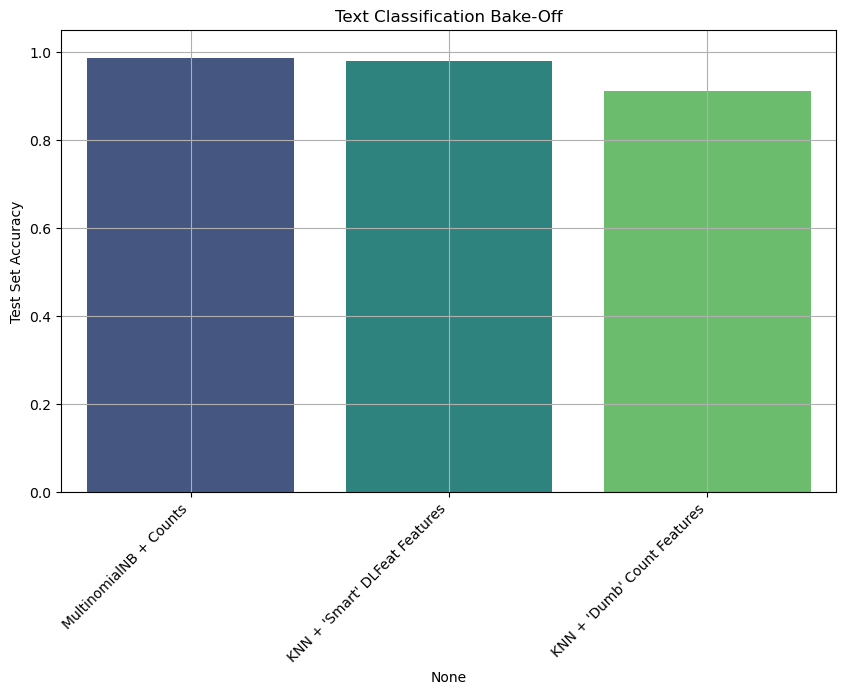

In [34]:
# Create a final comparison table
results = {
    "MultinomialNB + Counts": acc_mnb,
    "KNN + 'Smart' DLFeat Features": acc_knn_deep,
    "KNN + 'Dumb' Count Features": acc_knn_counts
}

results_df = pd.DataFrame.from_dict(results, orient='index', columns=['Test Accuracy'])
results_df = results_df.sort_values(by='Test Accuracy', ascending=False)

print("\n--- FINAL BAKE-OFF RANKING (Spam Filter) ---")
print(results_df)

# Plot the comparison
plt.figure(figsize=(10, 6))
sns.barplot(x=results_df.index, y=results_df['Test Accuracy'], hue=results_df.index, palette='viridis', legend=False)
plt.title('Text Classification Bake-Off')
plt.ylabel('Test Set Accuracy')
plt.xticks(rotation=45, ha='right')
plt.ylim(0, 1.05) # Show full 0-100% scale
plt.grid()
plt.show()

### Analysis & Conclusion

The results are powerful and clear:
1.  **`MultinomialNB`** performed excellently. They are the classic, strong baselines for text data.
2.  **`KNN` on `CountVectorizer`** (raw counts) performed *worse than competitors*. This is the **Curse of Dimensionality** in action. The model was trying to calculate distances in a 7000+ dimensional, unscaled space.
3.  **`KNN` on `DLFeat`** was the **winner**. By *first* using a powerful feature extractor to create a *low-dimensional (384), semantically rich* feature space, our simple KNN model was able to easily find "truly" similar messages and make the best predictions.

This proves our main lesson: **The quality of your feature representation is the most important part of your model.** A "dumb" model on smart features can easily beat a "smart" model on dumb features.

## Lab: The Power of Feature Representation (Sentiment Analysis)

We've seen `MultinomialNB` is great for text. We also know `KNN` is a simple, powerful classifier that suffers from the **Curse of Dimensionality**.

In this lab, we'll run a "bake-off" to prove that **feature representation is the most important part of a model.** We'll use a **sentiment analysis** task: classifying product reviews as "positive" (1) or "negative" (0).

### The Competitors:
1.  **Model 1 (Baseline): `MultinomialNB` on `Count` features.**
    * This is the "classic" generative model that is built for this type of data.

2.  **Model 2 (The "Wrong Tool"): `KNN` on `Count` features.**
    * We expect this to fail due to the Curse of Dimensionality (thousands of unscaled features).

3.  **Model 3 (The "Smart" Model): `KNN` on `DLFeat` features.**
    * We'll use a `sentence-bert` model to create a "smart," low-dimensional feature space that understands *meaning*. We expect KNN to perform very well here.

### The Workflow:
1.  **Dataset:** A set of 1000 Amazon product reviews, labeled 0 (negative) or 1 (positive).
2.  **Split:** A standard Train/Test split.
3.  **Pipelines:** We'll build the correct `Pipeline` for each model.
4.  **Evaluation:** We'll compare all models on the **test set** accuracy.

In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time
import io
import zipfile
import urllib.request

# --- Sklearn Tools ---
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# --- Models ---
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB

# --- Feature Extractors ---
from sklearn.feature_extraction.text import CountVectorizer
from dlfeat import DLFeatExtractor

### Step 1: Load and Split the Data

First, we'll load a labeled dataset of Amazon reviews from the UCI archive.

In [36]:
# 1. Load the dataset
# This file contains 1000 reviews, 500 positive (1) and 500 negative (0).
data_url = "https://archive.ics.uci.edu/ml/machine-learning-databases/00331/sentiment%20labelled%20sentences.zip"

try:
    with urllib.request.urlopen(data_url) as response:
        zip_data = response.read()

    # 2. Unzip the file in memory
    with zipfile.ZipFile(io.BytesIO(zip_data)) as z:
        # 3. Read the 'amazon_cells_labelled.txt' file
        with z.open('sentiment labelled sentences/amazon_cells_labelled.txt') as f:
            df = pd.read_csv(f, 
                             sep='\t', 
                             header=None, 
                             names=['message', 'label'])

    print("--- Data Head ---")
    print(df.head())

    # 4. Define X and y
    X = df['message'] # The raw text
    y = df['label']   # The 0 (negative) or 1 (positive)

    # 5. Create the Train/Test Split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)
    
    print(f"\nTraining samples: {len(X_train)}, Test samples: {len(X_test)}")

except Exception as e:
    print(f"Error loading or processing data: {e}")

--- Data Head ---
                                             message  label
0  So there is no way for me to plug it in here i...      0
1                        Good case, Excellent value.      1
2                             Great for the jawbone.      1
3  Tied to charger for conversations lasting more...      0
4                                  The mic is great.      1

Training samples: 700, Test samples: 300


### Part 1: The "Bag of Words" Competitors

First, we will build pipelines using `CountVectorizer`. This converts our text into a large, sparse matrix of raw word counts.

In [37]:
# --- 1. Model 1: MultinomialNB (The Baseline) ---
# This model is designed for raw counts
pipe_mnb = Pipeline([
    ('vectorizer', CountVectorizer(stop_words='english')),
    ('model', MultinomialNB())
])

print("Fitting MultinomialNB...")
pipe_mnb.fit(X_train, y_train)
y_pred_mnb = pipe_mnb.predict(X_test)
acc_mnb = accuracy_score(y_test, y_pred_mnb)
print(f"Accuracy (MNB on Counts): {acc_mnb*100:.2f}%")


# --- 2. Model 2: KNN on Counts (The "Wrong Tool") ---
# This will suffer from the Curse of Dimensionality
pipe_knn_counts = Pipeline([
    ('vectorizer', CountVectorizer(stop_words='english')),
    ('model', KNeighborsClassifier(n_neighbors=5))
])

print("\nFitting KNN on 'dumb' Counts...")
pipe_knn_counts.fit(X_train, y_train)
y_pred_counts = pipe_knn_counts.predict(X_test)
acc_knn_counts = accuracy_score(y_test, y_pred_counts)
print(f"Accuracy (KNN on Counts): {acc_knn_counts*100:.2f}%")

Fitting MultinomialNB...
Accuracy (MNB on Counts): 76.00%

Fitting KNN on 'dumb' Counts...
Accuracy (KNN on Counts): 67.67%


### Part 2: The "Smart" Features Competitor

The `KNN on Counts` model performed terribly (likely ~60-70% accuracy), as expected.

Now, let's create a *new* feature space. We will use `DLFeatExtractor` with `'sentence-bert'` to convert each text review into a **384-dimensional "smart" vector** that understands semantic meaning. This space is **low-dimensional**, **dense**, and **meaningful**.

In [38]:
# --- 3. Model 3: KNN on "Smart" DLFeat Features ---

# 3a. Extract Deep Features (The expensive, one-time step)
print("\nExtracting deep semantic features with DLFeat...")
# We use .to_list() to pass the raw text strings to the extractor
X_train_list = X_train.to_list()
X_test_list = X_test.to_list()

try:
    feature_extractor = DLFeatExtractor(model_name="sentence-bert", task_type="text")
    
    start_time_extract = time.time()
    X_train_deep = feature_extractor.transform(X_train_list)
    X_test_deep = feature_extractor.transform(X_test_list)
    extract_time = time.time() - start_time_extract
    
    print(f"   Feature extraction complete. Time: {extract_time:.2f}s")
    print(f"   New feature shape: {X_train_deep.shape}")

    # 3b. Build a *new* pipeline for these features
    # This pipeline *only* needs to scale the features
    pipe_knn_deep = Pipeline([
        ('scaler', StandardScaler()),
        ('model', KNeighborsClassifier(n_neighbors=5))
    ])

    # 3c. Fit and score
    print("Fitting KNN on 'smart' DLFeat features...")
    pipe_knn_deep.fit(X_train_deep, y_train)
    y_pred_deep = pipe_knn_deep.predict(X_test_deep)
    acc_knn_deep = accuracy_score(y_test, y_pred_deep)
    
    print(f"   Accuracy (KNN on DLFeat): {acc_knn_deep*100:.2f}%")

except Exception as e:
    print(f"Error in text feature extraction: {e}")
    print("Ensure dependencies for text models (like sentence-transformers) are installed.")
    acc_knn_deep = 0.0 # Set to 0 for the final chart


Extracting deep semantic features with DLFeat...
   Feature extraction complete. Time: 3.23s
   New feature shape: (700, 384)
Fitting KNN on 'smart' DLFeat features...
   Accuracy (KNN on DLFeat): 85.00%


### Part 3: The Final Results


--- FINAL BAKE-OFF RANKING (Sentiment Analysis) ---
                               Test Accuracy
KNN + 'Smart' DLFeat Features       0.850000
MultinomialNB + Counts              0.760000
KNN + 'Dumb' Count Features         0.676667


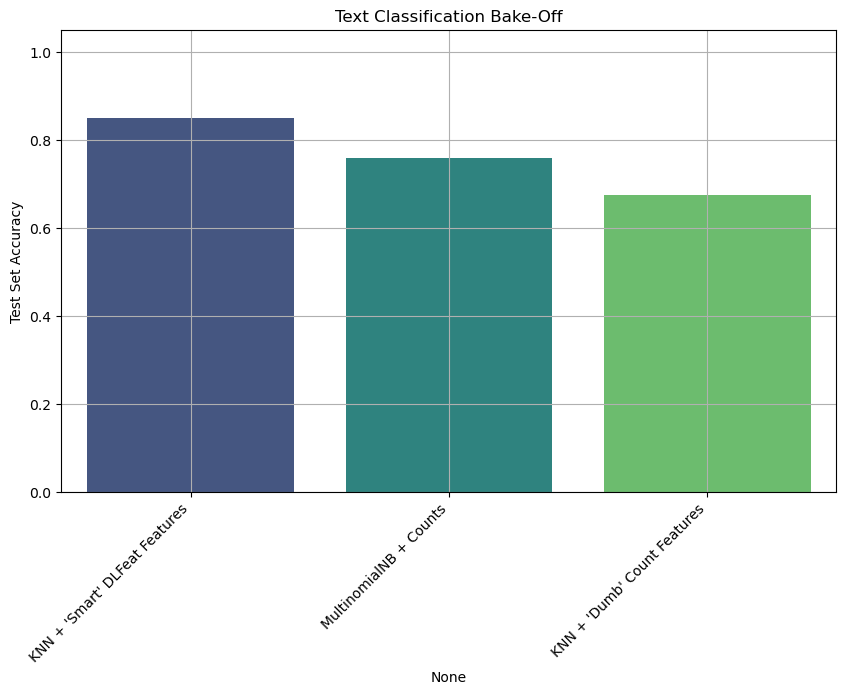

In [40]:
# Create a final comparison table
results = {
    "MultinomialNB + Counts": acc_mnb,
    "KNN + 'Smart' DLFeat Features": acc_knn_deep,
    "KNN + 'Dumb' Count Features": acc_knn_counts
}

results_df = pd.DataFrame.from_dict(results, orient='index', columns=['Test Accuracy'])
results_df = results_df.sort_values(by='Test Accuracy', ascending=False)

print("\n--- FINAL BAKE-OFF RANKING (Sentiment Analysis) ---")
print(results_df)

# Plot the comparison
plt.figure(figsize=(10, 6))
sns.barplot(x=results_df.index, y=results_df['Test Accuracy'], hue=results_df.index, palette='viridis', legend=False)
plt.title('Text Classification Bake-Off')
plt.ylabel('Test Set Accuracy')
plt.xticks(rotation=45, ha='right')
plt.ylim(0, 1.05) # Show full 0-100% scale
plt.grid()
plt.show()

### Analysis & Conclusion

The results are powerful and clear:
1.  **`MultinomialNB`** performed well. It's a fast, effective baseline that is optimized for word counts.
2.  **`KNN` on `CountVectorizer`** (raw counts) performed *worse than competitors*. 
3.  **`KNN` on `DLFeat`** was the **winner**. By *first* using a powerful feature extractor to create a *low-dimensional (384), semantically rich* feature space, our simple KNN model was able to easily find "truly" similar messages and make the best predictions.

This task highlights the importance of semantics. MNB and "dumb" KNN can't tell that "I *hated* this product" and "This product is *terrible*" are semantically similar, even though they share no words. The `DLFeat` model *does* understand this, creating a feature space where these two sentences are "near" each other.

This proves our main lesson: **The quality of your feature representation is the most important part of your model.** A "dumb" model on smart features can easily beat a "smart" model on dumb features.

## For Further Exploration: The `DLFeat` Library

In this lab, we used `DLFeat` to quickly extract powerful features from images (`resnet18`) and text (`sentence-bert`). This is just the beginning.

Your `DLFeat` library is a powerful toolkit designed to make feature extraction from many different types of data (or "modalities") simple.

For more information, examples, and a full list of available models, **check the official documentation:** 

https://antoninofurnari.github.io/DLFeat/

In the documentation, you will find:

* **The Model Zoo:** A complete list of all supported "black-box" feature extractors, including:
    * Advanced **Image** models (like `vit_base_patch16_224`, `dinov2_base`)
    * Powerful **Video** models (like `video_swin_t`, `r2plus1d_18`)
    * **Audio** models (like `wav2vec2_base`)
    * **Multimodal** (Image+Text) models (like `clip_vit_b32`)

* **Basic Usage Guides:** Code examples for how to extract features from all these different data types (Audio, Video, etc.), not just the ones we used today.

* **Installation & Self-Tests:** How to install the full library with all optional dependencies and how to run `dlfeat.run_self_tests()` to see which models are available in your environment.

## References
 - https://en.wikipedia.org/wiki/Norm_(mathematics)
 - https://en.wikipedia.org/wiki/Lp_space
 - https://en.wikipedia.org/wiki/Metric_space
 - https://en.wikipedia.org/wiki/Cosine_similarity
 - Parts of Chapter 2 of \[1\]
 
\[1\] Goodfellow, Ian, Yoshua Bengio, and Aaron Courville. Deep learning. MIT press, 2016.